In [29]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### NB on synthetic numerical arrays

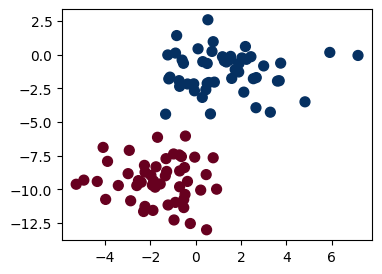

In [30]:
## to make synthetic dataset from simple Gaussian distribution
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=1.5)
plt.figure(figsize = (4,3))
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu');

## Extra: In this instance of generated data, there is no covariance between dimensions -> simply fit mean and std (GDA) -> because of *naive gaussian assumption

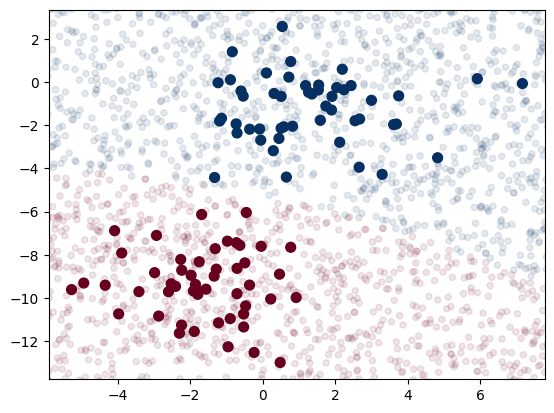

In [31]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X, y);

# test data
rng = np.random.RandomState(0)
Xnew = [-6, -14] + [14, 18] * rng.rand(2000, 2)
ynew = model.predict(Xnew)

## plot both
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='RdBu')
lim = plt.axis()
plt.scatter(Xnew[:, 0], Xnew[:, 1], c=ynew, s=20, cmap='RdBu', alpha=0.1)
plt.axis(lim);

In [32]:
yprob = model.predict_proba(Xnew)
yprob[-8:].round(2)

array([[0.89, 0.11],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.15, 0.85]])

## NB on text data

In [33]:
from sklearn.datasets import fetch_20newsgroups

news = fetch_20newsgroups()
print(news.keys())
news.target_names



dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])


['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [34]:
# select only a portion of categories
categories = ['talk.religion.misc', 'soc.religion.christian',
              'sci.space', 'comp.graphics']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

Gaussian NB scrore: 0.8659217877094972


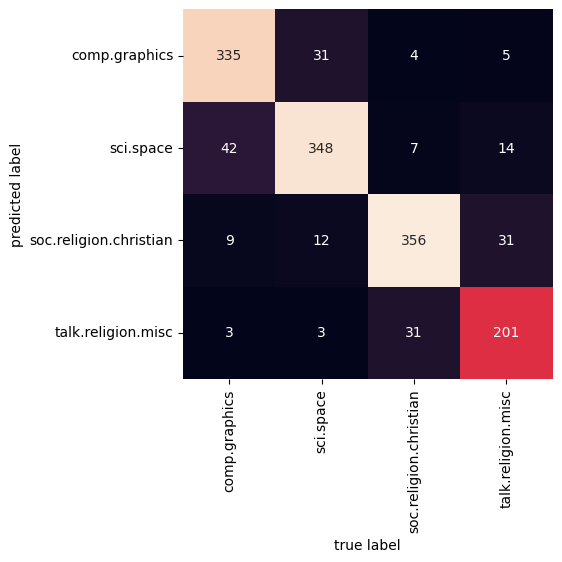

In [36]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import FunctionTransformer
from sklearn.naive_bayes import GaussianNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

# Create a function to convert sparse matrix to dense
to_dense = FunctionTransformer(lambda x: x.toarray(), accept_sparse=True)

model = make_pipeline(CountVectorizer(), to_dense, GaussianNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)
print('Gaussian NB scrore:', model.score(test.data, test.target))

mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

### Multinomial NB
    - Takes into account count of words in classification - with TF-IDF method. present words are 1 but words are weighted

Multinomial NB scrore: 0.8016759776536313


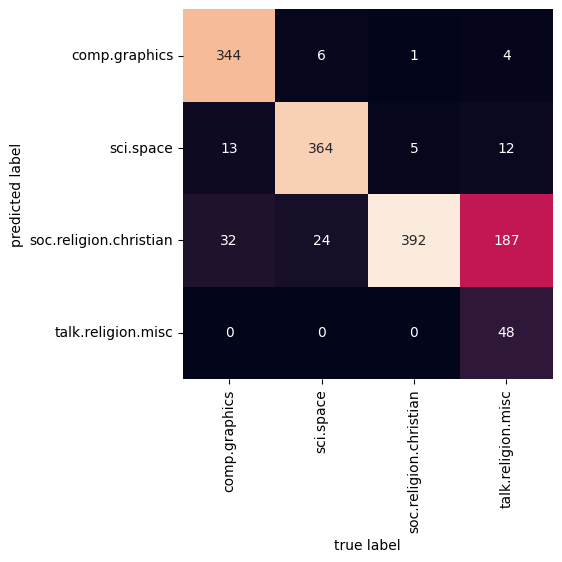

In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix

model = make_pipeline(TfidfVectorizer(), MultinomialNB())
model.fit(train.data, train.target)
labels = model.predict(test.data)
print('Multinomial NB scrore:', model.score(test.data, test.target))
      
mat = confusion_matrix(test.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=train.target_names, yticklabels=train.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');

__Multinomial NB did better on 3 out of 4 categories than NB.__

__But NB did well on the `religion` vs `christian` category: overall also in this case NB was better than Multinomial - but this may not be always true__

In [17]:
def predict_category(s, train=train, model=model):
    pred = model.predict([s])
    return train.target_names[pred[0]]

print(predict_category('sending a payload to the ISS'))

print(predict_category('determining the screen resolution'))

sci.space
comp.graphics


0.8659217877094972